In [1]:
import sys 
import os 
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
sys.path.append('../')
import glob
import tqdm

In [2]:
from src.utils.normalizer import Normalizer

In [40]:
#our spherical measure is the the conditioning of the eigenvalues of the covariance matrix

def spherical_measure(samples):
    samples = samples - samples.mean(dim=0)
    #samples of shape (n, d)
    n, d = samples.shape
    corr = torch.corrcoef(samples.T)
    # print(corr.shape)
    # raise ValueError
    #get the eigenvalues
    eigvals, _ = torch.linalg.eig(corr)
    
    eigvals = torch.abs(eigvals)
    # print(eigvals)
    # raise ValueError
    #condition number
    cond = torch.max(eigvals) / torch.min(eigvals)
    return cond.item()

def subvectorize_and_condition(W, d):
    
    if W.shape[1] % d != 0:
        #pad with zeros
        pad = d - (W.shape[1] % d)
        W = torch.cat([W, torch.zeros(W.shape[0], pad, device=W.device)], dim=1)
    

    #subvectorize
    W_sub = W.view(-1, d)
    return spherical_measure(W_sub)

In [43]:
# linear_layer = "layer_1/mlp.up_proj"

layers = glob.glob(f"/data/lliu/huffman/models/meta-llama/Llama-2-*/original_weights/*/*.pt")

device = torch.device("cuda:6")
Cs_orig = []
Cs_norm = []
d=6
with torch.no_grad():
    for linear_layer in tqdm.tqdm(layers):
        try:
            weight = torch.load(linear_layer, map_location=device)["weight"]
            
            C_orig = subvectorize_and_condition(weight,d)
            # raise ValueError
            _,weight_normalized = Normalizer.normalize_init(weight, [0,1], [False,False],norm_rescale=True, powers=2,
                                                        p=2)
            
            C_norm = subvectorize_and_condition(weight_normalized,d)
            
            Cs_orig.append(C_orig)
            Cs_norm.append(C_norm)
        except Exception as e:
            print(e)
            continue

 74%|███████▍  | 792/1064 [01:52<00:15, 17.19it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 75%|███████▌  | 799/1064 [01:52<00:16, 16.31it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 76%|███████▌  | 806/1064 [01:53<00:16, 15.96it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 76%|███████▋  | 813/1064 [01:53<00:15, 15.83it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 77%|███████▋  | 820/1064 [01:54<00:15, 15.66it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 78%|███████▊  | 827/1064 [01:54<00:15, 15.65it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 78%|███████▊  | 834/1064 [01:54<00:14, 15.70it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 79%|███████▉  | 841/1064 [01:55<00:14, 15.77it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 80%|███████▉  | 848/1064 [01:55<00:13, 15.69it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 80%|████████  | 855/1064 [01:56<00:13, 15.68it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 81%|████████  | 862/1064 [01:56<00:12, 15.71it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 82%|████████▏ | 869/1064 [01:57<00:12, 15.71it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 82%|████████▏ | 876/1064 [01:57<00:11, 15.76it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 83%|████████▎ | 883/1064 [01:58<00:11, 15.63it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 84%|████████▎ | 890/1064 [01:58<00:11, 15.66it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 84%|████████▍ | 897/1064 [01:58<00:10, 15.66it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 85%|████████▍ | 904/1064 [01:59<00:10, 15.66it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 86%|████████▌ | 911/1064 [01:59<00:09, 15.70it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 86%|████████▋ | 918/1064 [02:00<00:09, 15.56it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 87%|████████▋ | 925/1064 [02:00<00:08, 15.75it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 88%|████████▊ | 932/1064 [02:01<00:08, 15.72it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 88%|████████▊ | 939/1064 [02:01<00:07, 15.71it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 89%|████████▉ | 946/1064 [02:02<00:07, 15.68it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 90%|████████▉ | 953/1064 [02:02<00:07, 15.67it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 90%|█████████ | 960/1064 [02:03<00:06, 15.48it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 91%|█████████ | 967/1064 [02:03<00:06, 15.61it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 92%|█████████▏| 974/1064 [02:03<00:05, 15.66it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 92%|█████████▏| 981/1064 [02:04<00:05, 15.66it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 93%|█████████▎| 988/1064 [02:04<00:04, 15.56it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 94%|█████████▎| 995/1064 [02:05<00:04, 15.55it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 94%|█████████▍| 1002/1064 [02:05<00:03, 15.62it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 95%|█████████▍| 1009/1064 [02:06<00:03, 15.58it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 95%|█████████▌| 1016/1064 [02:06<00:03, 15.53it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 96%|█████████▌| 1023/1064 [02:07<00:02, 15.51it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 97%|█████████▋| 1030/1064 [02:07<00:02, 15.64it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 97%|█████████▋| 1037/1064 [02:07<00:01, 15.57it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 98%|█████████▊| 1044/1064 [02:08<00:01, 15.56it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 99%|█████████▉| 1051/1064 [02:08<00:00, 15.52it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


 99%|█████████▉| 1058/1064 [02:09<00:00, 15.71it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


100%|██████████| 1064/1064 [02:09<00:00,  8.21it/s]

torch.linalg.eig: input tensor should not contain infs or NaNs.


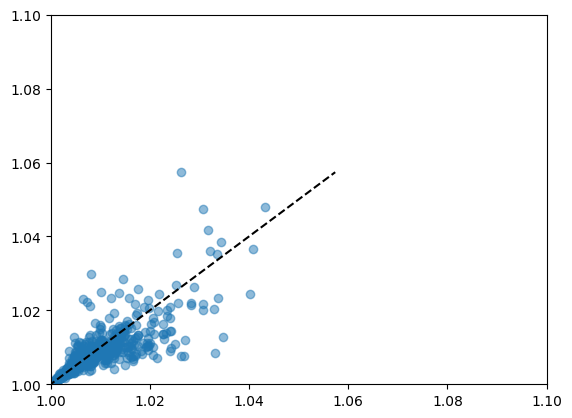

In [44]:
import matplotlib.pyplot as plt

plt.plot(Cs_norm,Cs_orig, 'o',alpha = 0.5)
#set equal aspect ratio

plot_range = [1, 1.1]
plt.ylim(plot_range)
plt.xlim(plot_range)

#draw a 1:1 line
plt.plot([0,max(Cs_orig)], [0,max(Cs_orig)], 'k--')

In [21]:
Cs_orig

[21.65917205810547,
 34.98318099975586,
 330.45819091796875,
 96.13386535644531,
 34.54720687866211,
 125.41545867919922,
 11.744349479675293,
 146.7382049560547,
 36.88841247558594,
 66.92771911621094,
 42.30125427246094,
 223.82974243164062,
 68.85382080078125,
 404.880859375,
 273.0745544433594,
 83.74523162841797,
 443.5111999511719,
 24.02142333984375,
 41.62482452392578,
 61.11040496826172,
 1026.084716796875,
 44.128170013427734,
 80.7614517211914,
 240.41563415527344,
 11.175971984863281,
 206.8996124267578,
 25.788101196289062,
 286.2560119628906,
 15.053216934204102,
 285.3208923339844,
 28.68284797668457,
 45.2976188659668,
 200.17530822753906,
 29.729496002197266,
 124.35733795166016,
 11.430561065673828,
 83.33008575439453,
 20.1378116607666,
 30.47677993774414,
 20.704666137695312,
 298.2412109375,
 19.044483184814453,
 10.679890632629395,
 119.38057708740234,
 78.32709503173828,
 1226.63427734375,
 34.7823486328125,
 173.1982879638672,
 51.439125061035156,
 13.6035594940